In [10]:
import sys, os
sys.path.append("../..")
import gempy as gp
import numpy as np

In [11]:
resolution = [50,50,50]
extent = np.array([777000, 794500, 6345000, 6353000, -3000, 1000])

In [12]:
geo_model = gp.create_model('Alesmodel')

In [13]:
gp.init_data(geo_model, extent = extent, resolution = resolution,
                        path_i = os.pardir+"/data/input_data/AlesModel/finalfinalfinal2_Points.csv",
                        path_o = os.pardir+"/data/input_data/AlesModel/Foliations_clust21.csv")

../..\gempy\core\data.py:1281: UserWarning: If pole_vector and orientation are passed pole_vector is used/
  warnings.warn('If pole_vector and orientation are passed pole_vector is used/')


Alesmodel  2019-05-24 13:55

In [14]:
print(len(geo_model.orientations.df))
print(len(geo_model.surface_points.df))
print(len(geo_model.surfaces.df))

329
334
9


In [15]:
#sorting of lithologies
gp.map_series_to_surfaces(geo_model,{'fault_NWSE':('fault_NWSE'),
                        'fault_NS':('fault_NS'),
                        'fault_NESW1':('fault_NESW1'),
                        'fault_NESW2':('fault_NESW2'),
                        'fault_NESW3':('fault_NESW3'),
                        'Trias_Series':('Liassic','Triassic'), 
                        'Carbon_Series':('Carboniferous'), 
                        'Basement_Series':('basement')},remove_unused_series=True)

,surface,series,order_surfaces,isBasement,color,id
3,fault_NWSE,fault_NWSE,1,False,#728f02,1
7,fault_NS,fault_NS,1,False,#5DA629,2
4,fault_NESW1,fault_NESW1,1,False,#443988,3
6,fault_NESW2,fault_NESW2,1,False,#325916,4
5,fault_NESW3,fault_NESW3,1,False,#ff3f20,5
0,Triassic,Trias_Series,1,False,#015482,6
2,Liassic,Trias_Series,2,False,#ffbe00,7
1,Carboniferous,Carbon_Series,1,False,#9f0052,8
8,basement,Basement_Series,1,True,#acc2d9,9


In [16]:
geo_model.series

,order_series,BottomRelation
fault_NWSE,1,Erosion
fault_NS,2,Erosion
fault_NESW1,3,Erosion
fault_NESW2,4,Erosion
fault_NESW3,5,Erosion
Trias_Series,6,Erosion
Carbon_Series,7,Erosion
Basement_Series,8,Erosion


In [17]:
colordict = {'Liassic':'#015482', 'Triassic': '#9f0052', 'Carboniferous':'#ffbe00','basement':'#728f02',
            'fault_NWSE':'#2a2a2a','fault_NS':'#2a2a2a','fault_NESW2':'#939393','fault_NESW1':'#939393',
             'fault_NESW3':'#939393' }
geo_model.surfaces.colors.change_colors(colordict)

,surface,series,order_surfaces,isBasement,color,id
3,fault_NWSE,fault_NWSE,1,False,#2a2a2a,1
7,fault_NS,fault_NS,1,False,#2a2a2a,2
4,fault_NESW1,fault_NESW1,1,False,#939393,3
6,fault_NESW2,fault_NESW2,1,False,#939393,4
5,fault_NESW3,fault_NESW3,1,False,#939393,5
0,Triassic,Trias_Series,1,False,#9f0052,6
2,Liassic,Trias_Series,2,False,#015482,7
1,Carboniferous,Carbon_Series,1,False,#ffbe00,8
8,basement,Basement_Series,1,True,#728f02,9


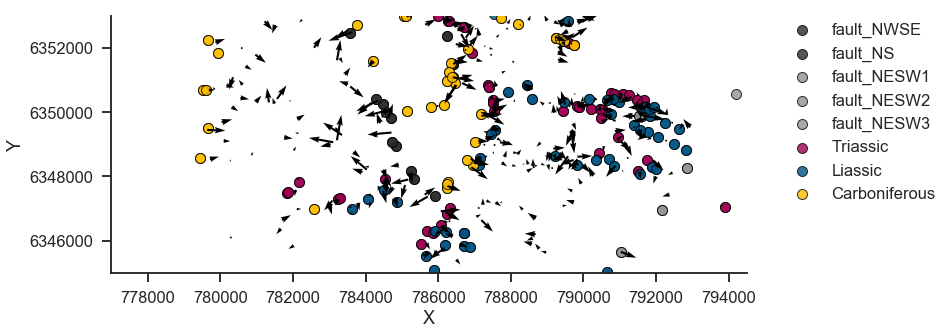

In [18]:
gp.plot.plot_data(geo_model,direction='z')
#plt.savefig("C:\\Users\\elisa\\Documents\\Masterarbeit\\Figures\\clusteredorient_only.png", format='png', dpi=1000)

#### Faults and fault relations

In [19]:
geo_model.set_is_fault(['fault_NWSE', 'fault_NS', 'fault_NESW1','fault_NESW2', 
                       'fault_NESW3'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,isFault,isFinite
fault_NWSE,True,False
fault_NS,True,False
fault_NESW1,True,False
fault_NESW2,True,False
fault_NESW3,True,False
Trias_Series,False,False
Carbon_Series,False,False
Basement_Series,False,False


In [21]:
fault_relations = np.load(os.pardir+"/data/input_data/AlesModel/fault_relations.npy")

In [22]:
geo_model.faults.set_fault_relation(fault_relations)

,fault_NWSE,fault_NS,fault_NESW1,fault_NESW2,fault_NESW3,Trias_Series,Carbon_Series,Basement_Series
fault_NWSE,False,False,False,False,False,True,True,False
fault_NS,False,False,False,False,False,True,True,False
fault_NESW1,False,False,False,False,False,True,False,False
fault_NESW2,False,False,False,False,False,True,False,False
fault_NESW3,False,False,False,False,False,True,False,False
Trias_Series,False,False,False,False,False,False,False,False
Carbon_Series,False,False,False,False,False,False,False,False
Basement_Series,False,False,False,False,False,False,False,False


In [23]:
gp.set_interpolation_data(geo_model,
                          output='geology', compile_theano=True,
                          theano_optimizer='fast_compile',
                          verbose=[])

Compiling theano function...
Compilation Done!


### Topography

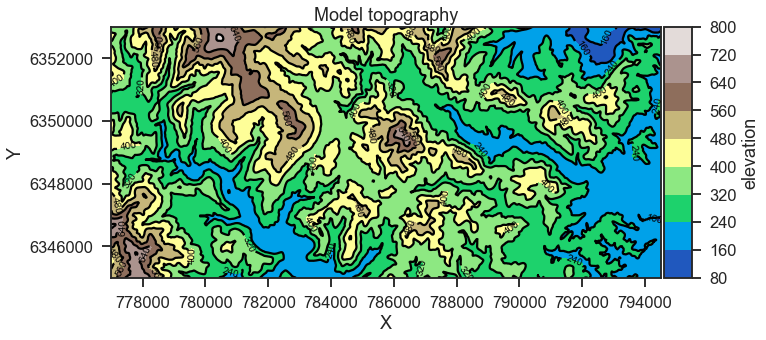

In [24]:
geo_model.set_topography(source='npy',filepath=os.pardir+"/data/input_data/AlesModel/AlesTopo.npy")

In [25]:
gp.compute_model(geo_model, compute_mesh=True)


Lithology ids 
  [9. 9. 9. ... 6. 6. 6.] 

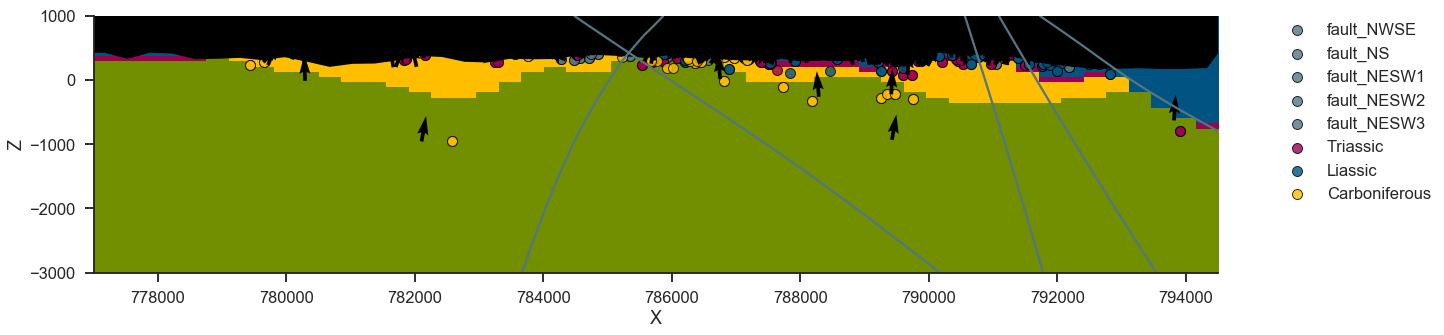

In [29]:
gp.plot.plot_section(geo_model, cell_number=18, block=geo_model.solutions.lith_block,
                         direction='y',show_faults=True,show_topo=True,show_data=True)

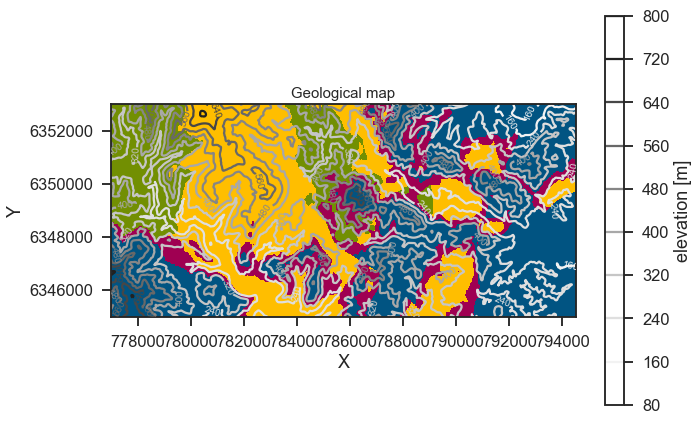

In [27]:
gp.plot.plot_map(geo_model)